In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define initial condition function, $\phi(x,t=0)$

In [2]:
def Init_cond(x):
  if x>=400. and x<500.:
    return 0.01*(x-400.)
  elif x>=500. and x<=600.:
    return 2.0-0.01*(x-400.)
  else:
    return 0.0


# Define the constant values

In [3]:
dt=0.2/0.95  #check cfa number
dt

0.2105263157894737

In [4]:
dt=500
tmax=2000.

u=.95
k=0.029

Xmax=1000.
x_min=0.0 
dx=.2
Dt=0.1

alpha=0.1
beta=0.53


h=Dt*u/dx
K=Dt*k/dx**2

nx=int((Xmax-x_min)/dx)+1
x=np.linspace(x_min,Xmax,nx)

In [5]:
def phiPast(phi_now):
  phi_past=np.roll(phi_now,1)
  return phi_past


def phiFuture(phi_now):
  phi_future=np.roll(phi_now,-1)
  return phi_future

def mod(n,r):
  return n%r

#Create functions for PDE and constant of $\phi(t=t_1)$

In [6]:
def phi1_update(phi_new,K,h):
    phi_neww=phi_new-0.5*h*(np.roll(phi_new,-1)-np.roll(phi_new,1))+K*(np.roll(phi_new,-1)-2.0*phi_new+np.roll(phi_new,1))
    return phi_neww

In [7]:
def phi_update(phi_old,phi_new,K,h):
    phi_neww = (phi_old - h*(np.roll(phi_new,-1) - np.roll(phi_new,1)) +
       2.*K*(np.roll(phi_old,-1) - 2.0*phi_old + np.roll(phi_old,1)))
    return phi_neww

# Assign the initial condition and the first two solutions $\phi(t=t_0) \ and \ \phi(t=t_1)$

In [8]:

phi_n_minus_one=np.array(list(map(Init_cond,x))) # phi_0

phi_n=phi1_update(phi_n_minus_one,K,h) #phi_1



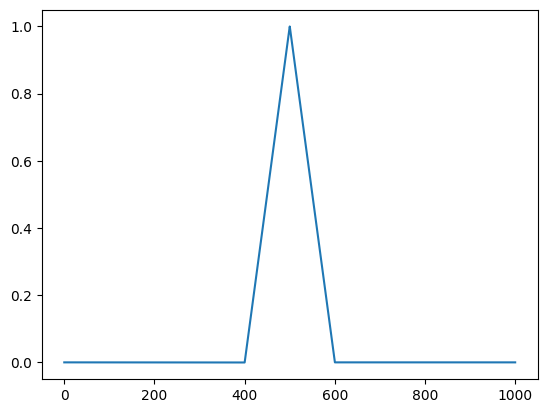

In [9]:
plt.plot(x,phi_n)

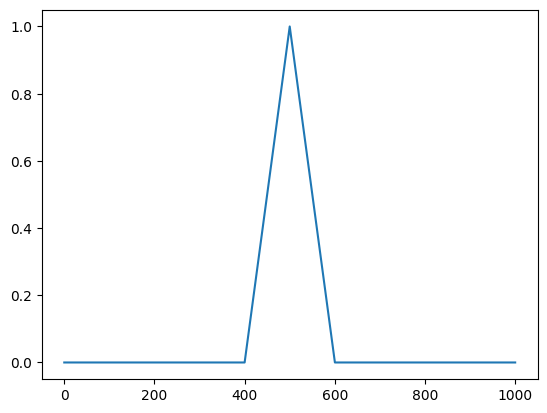

In [10]:
plt.plot(x,phi_n_minus_one)

#Create a loop for a problem solving by using  RAW filter

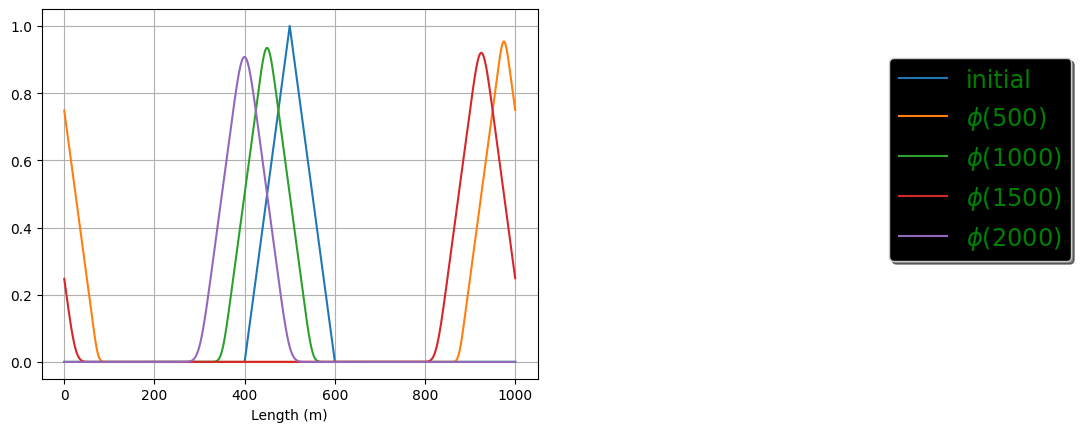

In [11]:

phi_n_minus_one=np.array(list(map(Init_cond,x))) # phi_0
phi_n = phi1_update(phi_n_minus_one,K,h) #phi_1
plt.plot(x,phi_n_minus_one,label='initial')

t = Dt #start from t1
while t < tmax:
  t = t + Dt
  phi_new = phi_update(phi_n_minus_one,phi_n,K,h)
  if mod(t,500)<Dt:
    plt.plot(x,phi_new,label=r'$\phi(%s)$'%int(t))
 
  d = alpha*(phi_new-2.*phi_n+phi_n_minus_one) #compute d
  phi_n_minus_one[:] = phi_n + beta*d  #update phi_n_minus_one  
  phi_n[:] = phi_new - (beta-1)*d  #update phi_n
plt.xlabel('Length (m)')
plt.grid('on')
plt.legend(loc='upper right',bbox_to_anchor=(2.1,0.9),shadow=True,fancybox=True,facecolor='k',labelcolor='g',fontsize='xx-large')



plt.show()

# Without using RAW filter

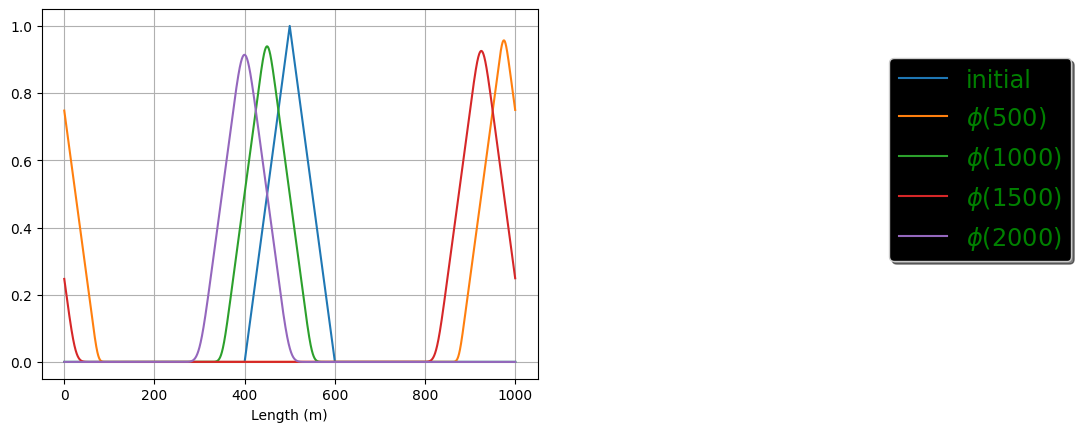

In [12]:
phi_n_minus_one=np.array(list(map(Init_cond,x))) # phi_0
phi_n = phi1_update(phi_n_minus_one,K,h) #phi_1
plt.plot(x,phi_n_minus_one,label='initial')

t = Dt #start from t1
while t < tmax:
  t = t + Dt
  phi_new = phi_update(phi_n_minus_one,phi_n,K,h)
  if mod(t,500)<Dt:
    plt.plot(x,phi_new,label=r'$\phi(%s)$'%int(t))
  phi_n_minus_one[:] = phi_n
  phi_n[:] = phi_new 

plt.xlabel('Length (m)')
plt.grid('on')
plt.legend(loc='upper right',bbox_to_anchor=(2.1,0.9),shadow=True,fancybox=True,facecolor='k',labelcolor='g',fontsize='xx-large')


plt.show()